## SF crime data analysis and modeling (DD: 10/12/2020 过期不侯哈)

### In this notebook, we will use Spark SQL for big data analysis on SF crime data. (https://data.sfgov.org/Public-Safety/Police-Department-Incident-Reports-Historical-2003/tmnf-yvry).

In [0]:
from csv import reader
from pyspark.sql import Row 
from pyspark.sql import SparkSession
from pyspark.sql.types import *
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings

import os
os.environ["PYSPARK_PYTHON"] = "python3"


In [0]:
# import urllib.request
# urllib.request.urlretrieve("https://data.sfgov.org/api/views/tmnf-yvry/rows.csv?accessType=DOWNLOAD", "/tmp/myxxxx.csv")
# dbutils.fs.mv("file:/tmp/myxxxx.csv", "dbfs:/laioffer/spark_hw1/data/sf_03_18.csv")
# display(dbutils.fs.ls("dbfs:/laioffer/spark_hw1/data/"))
## or
# https://data.sfgov.org/api/views/tmnf-yvry/rows.csv?accessType=DOWNLOAD


path,name,size
dbfs:/laioffer/spark_hw1/data/ny_10_09.csv,ny_10_09.csv,275701
dbfs:/laioffer/spark_hw1/data/sf_03_18.csv,sf_03_18.csv,559169754


In [0]:
data_path = "dbfs:/laioffer/spark_hw1/data/sf_03_18.csv"
# use this file name later

### Solve  big data issues via Spark

In [0]:

from pyspark.sql import SparkSession
spark = SparkSession \
    .builder \
    .appName("crime analysis") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

df_opt1 = spark.read.format("csv").option("header", "true").load(data_path)
display(df_opt1)
df_opt1.createOrReplaceTempView("sf_crime")

## helper function to transform the date, here are some options

# refer: https://jaceklaskowski.gitbooks.io/mastering-spark-sql/spark-sql-functions-datetime.html
# Method 1:
# from pyspark.sql.functions import to_date, to_timestamp, hour
# df_opt1 = df_opt1.withColumn('Date', to_date(df_opt1.OccurredOn, "MM/dd/yy"))
# df_opt1 = df_opt1.withColumn('Time', to_timestamp(df_opt1.OccurredOn, "MM/dd/yy HH:mm"))
# df_opt1 = df_opt1.withColumn('Hour', hour(df_opt1['Time']))
# df_opt1 = df_opt1.withColumn("DayOfWeek", date_format(df_opt1.Date, "EEEE"))

## Method 2:
#from pyspark.sql.functions import col, udf
#from pyspark.sql.functions import expr
#from pyspark.sql.functions import from_unixtime

#date_func =  udf (lambda x: datetime.strptime(x, '%m/%d/%Y'), DateType())
#month_func = udf (lambda x: datetime.strptime(x, '%m/%d/%Y').strftime('%Y/%m'), StringType())

#df = df_opt1.withColumn('month_year', month_func(col('Date')))\
#           .withColumn('Date_time', date_func(col('Date')))

## Method 3:
# select Date, substring(Date,7) as Year, substring(Date,1,2) as Month from sf_crime


## Method 4:
# from pyspark.sql.functions import *
# df_update = df_opt1.withColumn("Date", to_date(col("Date"), "MM/dd/yyyy")) ##change datetype from string to date
# df_update.createOrReplaceTempView("sf_crime")
# crimeYearMonth = spark.sql("SELECT Year(Date) AS Year, Month(Date) AS Month, FROM sf_crime")

PdId,IncidntNum,Incident Code,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,location,SF Find Neighborhoods 2 2,Current Police Districts 2 2,Current Supervisor Districts 2 2,Analysis Neighborhoods 2 2,DELETE - Fire Prevention Districts 2 2,DELETE - Police Districts 2 2,DELETE - Supervisor Districts 2 2,DELETE - Zip Codes 2 2,DELETE - Neighborhoods 2 2,DELETE - 2017 Fix It Zones 2 2,Civic Center Harm Reduction Project Boundary 2 2,Fix It Zones as of 2017-11-06 2 2,DELETE - HSOC Zones 2 2,Fix It Zones as of 2018-02-07 2 2,"CBD, BID and GBD Boundaries as of 2017 2 2","Areas of Vulnerability, 2016 2 2",Central Market/Tenderloin Boundary 2 2,Central Market/Tenderloin Boundary Polygon - Updated 2 2,HSOC Zones as of 2018-06-05 2 2,OWED Public Spaces 2 2,Neighborhoods 2
4018830907041,040188309,07041,VEHICLE THEFT,"VEHICLE, RECOVERED, AUTO",Sunday,02/15/2004,02:00,SOUTHERN,NONE,BRANNAN ST / 1ST ST,-120.5,90,POINT (-120.50000000000001 90),null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
13605159706372,136051597,06372,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Thursday,03/14/2013,09:21,SOUTHERN,NONE,1300 Block of STEVENSON ST,-122.421594519119,37.7707674171464,POINT (-122.421594519119 37.7707674171464),32,1,10,20,8,2,9,28853,19,null,null,null,null,null,null,2,null,null,null,null,32
13618826906244,136188269,06244,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,10/08/2013,19:30,MISSION,NONE,VALENCIA ST / DUBOCE AV,-122.422367409563,37.7698682392455,POINT (-122.422367409563 37.7698682392455),null,3,5,20,8,4,5,28853,19,null,null,null,3,null,null,2,null,null,3,null,null
4098938926105,040989389,26105,OTHER OFFENSES,FALSE REPORT OF BOMB,Sunday,08/29/2004,22:47,PARK,NONE,300 Block of WOODSIDE AV,-122.452716700987,37.7457451434135,POINT (-122.452716700987 37.7457451434135),49,7,8,38,1,5,4,59,38,null,null,null,null,null,null,1,null,null,null,null,49
5085058207021,050850582,07021,VEHICLE THEFT,STOLEN AUTOMOBILE,Friday,07/29/2005,21:00,INGLESIDE,NONE,0 Block of RAE AV,-122.448127287476,37.7121636146229,POINT (-122.448127287476 37.7121636146229),66,9,1,28,9,7,6,28861,25,null,null,null,null,null,null,2,null,null,null,null,66
13085582009320,130855820,09320,FRAUD,"CREDIT CARD, THEFT BY USE OF",Tuesday,10/08/2013,21:11,PARK,NONE,2600 Block of GEARY BL,-122.446612978839,37.7822458223917,POINT (-122.44661297883898 37.7822458223917),13,8,6,18,15,5,1,54,16,null,null,null,null,null,null,1,null,null,null,null,13
11091687865016,110916878,65016,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Sunday,11/13/2011,10:15,BAYVIEW,"ARREST, CITED",PHELPS ST / EVANS AV,-122.388456834121,37.7429830266541,POINT (-122.388456834121 37.7429830266541),86,2,9,1,10,3,8,58,1,null,null,null,null,null,null,1,null,null,null,null,86
5116515606241,051165156,06241,LARCENY/THEFT,PETTY THEFT FROM LOCKED AUTO,Saturday,10/15/2005,13:00,RICHMOND,NONE,DIVISADERO ST / SUTTER ST,-122.439874051516,37.7852471617589,POINT (-122.439874051516 37.7852471617589),103,4,11,15,15,6,11,29490,13,null,null,null,null,null,null,2,null,null,null,null,103
5099200968020,050992009,68020,OTHER OFFENSES,MISCELLANEOUS INVESTIGATION,Saturday,09/03/2005,21:21,TARAVAL,NONE,1500 Block of 12TH AV,-122.469264894685,37.7592163037102,POINT (-122.469264894685 37.7592163037102),109,10,8,14,1,8,4,56,12,null,null,null,null,null,null,1,null,null,null,null,109
9118446702004,091184467,02004,"SEX OFFENSES, FORCIBLE","FORCIBLE RAPE, BODILY FORCE",Monday,11/16/2009,12:49,TENDERLOIN,DISTRICT ATTORNEY REFUSES TO PROSECUTE,500 Block of JONES ST,-122.412999075009,37.786277459166,POINT (-122.412999075009 37.786277459166),20,5,10,36,5,10,9,28852,36,null,null,null,null,null,null,2,1,1,null,null,20


#### OLAP Queries

In [0]:
q1_result = df_opt1.groupBy('category').count().orderBy('count', ascending=False)
display(q1_result)

category,count
LARCENY/THEFT,477975
OTHER OFFENSES,303027
NON-CRIMINAL,236937
ASSAULT,191384
VEHICLE THEFT,126228
DRUG/NARCOTIC,117875
VANDALISM,114718
WARRANTS,99821
BURGLARY,91067
SUSPICIOUS OCC,79740


Answer: From the bar chart above, we can see that top crime categories include, but are not limited to Larcency/Theft, other offenses, Non-criminal, Assault, and Vehicle theft.

In [0]:
#Spark SQL based
crimeCategory = spark.sql("SELECT  category, COUNT(*) AS Count FROM sf_crime GROUP BY category ORDER BY Count DESC")
display(crimeCategory)

category,Count
LARCENY/THEFT,477975
OTHER OFFENSES,303027
NON-CRIMINAL,236937
ASSAULT,191384
VEHICLE THEFT,126228
DRUG/NARCOTIC,117875
VANDALISM,114718
WARRANTS,99821
BURGLARY,91067
SUSPICIOUS OCC,79740


In [0]:
# important hints: 
## first step: spark df or sql to compute the statisitc result 
## second step: export your result to a pandas dataframe. 

crimes_pd_df = crimeCategory.toPandas()

# Spark does not support this function, please refer https://matplotlib.org/ for visuliation. You need to use display to show the figure in the databricks community. 

#display(p)

#### Query 2
Counts the number of crimes for different district, and visualize your results

In [0]:
q2_result = df_opt1.groupBy('pdDistrict').count().orderBy('count', ascending=False)
display(q2_result)

pdDistrict,count
SOUTHERN,394234
MISSION,293072
NORTHERN,269229
CENTRAL,223962
BAYVIEW,210729
TENDERLOIN,189034
INGLESIDE,186645
TARAVAL,158710
PARK,121070
RICHMOND,114267


Answer: used imbedded plot options for the bar chart.

In [0]:
from pyspark.sql.functions import col, unix_timestamp, to_date
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType, IntegerType, array, FloatType

#### Query 3
Count the number of crimes each Saturday and Friday at "SF downtown".   

SF downtown is defiend  via the range of spatial location. For example, you can use a rectangle to define the SF downtown, or you can define a cicle with center as well. Thus, you need to write your own UDF function to filter data which are located inside certain spatial range. You can follow the example here: https://changhsinlee.com/pyspark-udf/

One way to define SF Downtown can be rectangle a < x < b  and c < y < d. thus, San Francisco Latitude and longitude coordinates are: 37.773972, -122.431297. X and Y represents each. So we assume SF downtown spacial range: X (-122.4213,-122.4313), Y(37.7540,37.7740).

In [0]:
df_opt1.printSchema()

root
-- PdId: string (nullable = true)
-- IncidntNum: string (nullable = true)
-- Incident Code: string (nullable = true)
-- Category: string (nullable = true)
-- Descript: string (nullable = true)
-- DayOfWeek: string (nullable = true)
-- Date: string (nullable = true)
-- Time: string (nullable = true)
-- PdDistrict: string (nullable = true)
-- Resolution: string (nullable = true)
-- Address: string (nullable = true)
-- X: string (nullable = true)
-- Y: string (nullable = true)
-- location: string (nullable = true)
-- SF Find Neighborhoods 2 2: string (nullable = true)
-- Current Police Districts 2 2: string (nullable = true)
-- Current Supervisor Districts 2 2: string (nullable = true)
-- Analysis Neighborhoods 2 2: string (nullable = true)
-- DELETE - Fire Prevention Districts 2 2: string (nullable = true)
-- DELETE - Police Districts 2 2: string (nullable = true)
-- DELETE - Supervisor Districts 2 2: string (nullable = true)
-- DELETE - Zip Codes 2 2: string (nullable = true)
-- DELETE - Neighborhoods 2 2: string (nullable = true)
-- DELETE - 2017 Fix It Zones 2 2: string (nullable = true)
-- Civic Center Harm Reduction Project Boundary 2 2: string (nullable = true)
-- Fix It Zones as of 2017-11-06 2 2: string (nullable = true)
-- DELETE - HSOC Zones 2 2: string (nullable = true)
-- Fix It Zones as of 2018-02-07 2 2: string (nullable = true)
-- CBD, BID and GBD Boundaries as of 2017 2 2: string (nullable = true)
-- Areas of Vulnerability, 2016 2 2: string (nullable = true)
-- Central Market/Tenderloin Boundary 2 2: string (nullable = true)
-- Central Market/Tenderloin Boundary Polygon - Updated 2 2: string (nullable = true)
-- HSOC Zones as of 2018-06-05 2 2: string (nullable = true)
-- OWED Public Spaces 2 2: string (nullable = true)
-- Neighborhoods 2: string (nullable = true)

In [0]:
# convert Date to DateType

# date_func =  udf (lambda x: datetime.strptime(x, '%m/%d/%Y'), DateType())
# df = df_opt1.withColumn('date', date_func(col('Date')))

# df = df.select("X", "Y", "DayOfWeek", "date", is_downtown("X", "Y").alias("isDowntown"))

# q3_saturday = df.filter((df.DayOfWeek == "Saturday") & (df.isDowntown == 1)).groupBy("date").count().orderBy('date')
# display(q3_saturday)

In [0]:
result = spark.sql(""" WITH cte AS(
                       SELECT DATE, SUBSTRING(DATE, 7, 4) AS Year, SUBSTRING(DATE, 1, 5) AS dt
                       FROM sf_crime 
                       WHERE (DayOfWeek = "Saturday") AND (X BETWEEN -122.4313 AND -122.4213) AND (Y BETWEEN 37.7540 AND 37.7740)
                       )
                       SELECT Year, dt, COUNT(*) as count
                       FROM cte
                       GROUP BY Year, dt
                       ORDER BY Year, dt
                  """)
display(result)

Year,dt,count
2003,01/04,14
2003,01/11,14
2003,01/18,16
2003,01/25,15
2003,02/01,17
2003,02/08,19
2003,02/15,10
2003,02/22,21
2003,03/01,32
2003,03/08,21


In [0]:
# count of crimes on each weekday in Downtown

# dayofWeek_avg = df.filter(df.isDowntown == 1).groupBy("DayOfWeek").count().orderBy('count', ascending=False)

# display(dayofWeek_avg)


--------------------------------------------------------------------------- 
 AttributeError Traceback (most recent call last)
 <command-4437872387987212> in <module> 
 1 # count of crimes on each weekday in Downtown 
 2 
 ----> 3 dayofWeek_avg = df . filter ( df . isDowntown == 1 ) . groupBy ( "DayOfWeek" ) . count ( ) . orderBy ( 'count' , ascending = False ) 
 4 
 5 display ( dayofWeek_avg ) 

 /databricks/spark/python/pyspark/sql/dataframe.py in __getattr__ (self, name) 
 1417 if name not in self . columns : 
 1418 raise AttributeError(
 -> 1419 "'%s' object has no attribute '%s'" % (self.__class__.__name__, name))
 1420 jc = self . _jdf . apply ( name ) 
 1421 return Column ( jc ) 

 AttributeError : 'DataFrame' object has no attribute 'isDowntown'

In [0]:
# q3_friday = df.filter((df.DayOfWeek == "Friday") & (df.isDowntown == 1)).groupBy("date").count().orderBy('date')
# display(q3_friday)

--------------------------------------------------------------------------- 
 AttributeError Traceback (most recent call last)
 <command-4437872387987211> in <module> 
 ----> 1 q3_friday = df . filter ( ( df . DayOfWeek == "Friday" ) & ( df . isDowntown == 1 ) ) . groupBy ( "date" ) . count ( ) . orderBy ( 'date' ) 
 2 display ( q3_friday ) 

 /databricks/spark/python/pyspark/sql/dataframe.py in __getattr__ (self, name) 
 1417 if name not in self . columns : 
 1418 raise AttributeError(
 -> 1419 "'%s' object has no attribute '%s'" % (self.__class__.__name__, name))
 1420 jc = self . _jdf . apply ( name ) 
 1421 return Column ( jc ) 

 AttributeError : 'DataFrame' object has no attribute 'isDowntown'

using the assumption for latitude and longitude from Hint 2, I defined the area of downtown SF to be X <= 122.4313, Y <= 37.7740.

Historically Fridays and Saturdays have the most crimes compared to other days of the week. Number of cases on each friday generally ranges from 10 to 25, and on each Saturday, the majority ranges from 10 to 30.

#### Query 4
Analysis the number of crime in each month of 2015, 2016, 2017, 2018. Then, give your insights for the output results. What is the business impact for your result?

In [0]:
# month_func = udf (lambda x: datetime.strptime(x, '%m/%d/%Y').strftime('%Y/%m'), StringType())

# df4 = df_opt1.withColumn('month_year', month_func(col('Date')))

# q4_result = df4.filter((df4.month_year >= "2015/01") & (df4.month_year <= "2018/12")).groupBy('month_year').count().orderBy('month_year')
# display(q4_result)

org.apache.spark.SparkException: Job aborted due to stage failure: Task 1 in stage 40.0 failed 1 times, most recent failure: Lost task 1.0 in stage 40.0 (TID 133, ip-10-172-236-245.us-west-2.compute.internal, executor driver): org.apache.spark.api.python.PythonException: 'NameError: name 'datetime' is not defined', from , line 1. Full traceback below:
Traceback (most recent call last):
 File "/databricks/spark/python/pyspark/worker.py", line 654, in main
 process()
 File "/databricks/spark/python/pyspark/worker.py", line 646, in process
 serializer.dump_stream(out_iter, outfile)
 File "/databricks/spark/python/pyspark/serializers.py", line 231, in dump_stream
 self.serializer.dump_stream(self._batched(iterator), stream)
 File "/databricks/spark/python/pyspark/serializers.py", line 145, in dump_stream
 for obj in iterator:
 File "/databricks/spark/python/pyspark/serializers.py", line 220, in _batched
 for item in iterator:
 File "/databricks/spark/python/pyspark/worker.py", line 467, in mapper
 result = tuple(f(*[a[o] for o in arg_offsets]) for (arg_offsets, f) in udfs)
 File "/databricks/spark/python/pyspark/worker.py", line 467, in 
 result = tuple(f(*[a[o] for o in arg_offsets]) for (arg_offsets, f) in udfs)
 File "/databricks/spark/python/pyspark/worker.py", line 91, in 
 return lambda *a: f(*a)
 File "/databricks/spark/python/pyspark/util.py", line 109, in wrapper
 return f(*args, **kwargs)
 File " ", line 1, in 
NameError: name 'datetime' is not defined

	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.handlePythonException(PythonRunner.scala:598)
	at org.apache.spark.sql.execution.python.PythonUDFRunner$$anon$2.read(PythonUDFRunner.scala:81)
	at org.apache.spark.sql.execution.python.PythonUDFRunner$$anon$2.read(PythonUDFRunner.scala:64)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.hasNext(PythonRunner.scala:551)
	at org.apache.spark.InterruptibleIterator.hasNext(InterruptibleIterator.scala:37)
	at scala.collection.Iterator$$anon$11.hasNext(Iterator.scala:489)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:458)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:458)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenExec$$anon$1.hasNext(WholeStageCodegenExec.scala:733)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:458)
	at org.apache.spark.ContextAwareIterator.hasNext(ContextAwareIterator.scala:37)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:458)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:458)
	at scala.collection.Iterator$GroupedIterator.fill(Iterator.scala:1209)
	at scala.collection.Iterator$GroupedIterator.hasNext(Iterator.scala:1215)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:458)
	at scala.collection.Iterator.foreach(Iterator.scala:941)
	at scala.collection.Iterator.foreach$(Iterator.scala:941)
	at scala.collection.AbstractIterator.foreach(Iterator.scala:1429)
	at org.apache.spark.api.python.PythonRDD$.writeIteratorToStream(PythonRDD.scala:442)
	at org.apache.spark.sql.execution.python.PythonUDFRunner$$anon$1.writeIteratorToStream(PythonUDFRunner.scala:50)
	at org.apache.spark.api.python.BasePythonRunner$WriterThread.$anonfun$run$1(PythonRunner.scala:478)
	at org.apache.spark.util.Utils$.logUncaughtExceptions(Utils.scala:2146)
	at org.apache.spark.api.python.BasePythonRunner$WriterThread.run(PythonRunner.scala:270)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2519)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2466)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2460)
	at scala.collection.mutable.ResizableArray.foreach(Resizabl

In [0]:
result = spark.sql(""" WITH cte AS(
                       SELECT DATE, SUBSTRING(DATE, 7, 4) AS Year, SUBSTRING(DATE, 1, 2) AS Month
                       FROM sf_crime 
                       )
                       SELECT Year, Month, COUNT(*) as count
                       FROM cte
                       WHERE Year BETWEEN 2015 AND 2018
                       GROUP BY Year, Month
                       ORDER BY Year, Month
                  """)
display(result)

Year,Month,count
2015,01,13370
2015,02,12055
2015,03,13674
2015,04,12705
2015,05,13511
2015,06,13073
2015,07,13158
2015,08,13523
2015,09,12666
2015,10,12889


Given this line chart, we can see that the average crime count dropped significantly, first from 2017/11 to 2018/02, and 2018/03 to 2018/05. We should research for external reasons what caused such drastic changes within these two periods of time.

There are only 5 months of records in 2018, so we cannot conclude that the crime counts never bounced back in the rest of 2018, just from this data.

"A 2018 study by the California Policy Lab and researchers at the University of California, Berkeley found a significant decrease in assaults and thefts after SFPD expanded its foot patrol strategy, which focuses on crime deterrence and improved responsiveness and engagement with community members." -- A good read: https://www.sanfranciscopolice.org/news/sfpd-releases-2018-year-end-public-safety-statistics-report

#### Query 5
Analysis the number of crime w.r.t the hour in certian day like 2015/12/15, 2016/12/15, 2017/12/15. Then, give your travel suggestion to visit SF.

First I'll compare each date as a separate query and visualization, and then followed by all of them in one query. It's easier to explain the insights individual visualizations.

In [0]:
# hour_func = udf (lambda x: float(x[:2]), FloatType())
# date_func =  udf (lambda x: datetime.strptime(x, '%m/%d/%Y'), DateType())

# df4 = df_opt1.withColumn('hour', hour_func(col('Time'))).withColumn('date', date_func(col('Date')))

# dec_15_2015 = df4.filter((df4.date == "2015-12-15")).groupby('hour').count().orderBy('hour')
# display(dec_15_2015)


org.apache.spark.SparkException: Job aborted due to stage failure: Task 2 in stage 23.0 failed 1 times, most recent failure: Lost task 2.0 in stage 23.0 (TID 58, ip-10-172-236-245.us-west-2.compute.internal, executor driver): org.apache.spark.api.python.PythonException: 'NameError: name 'datetime' is not defined', from , line 2. Full traceback below:
Traceback (most recent call last):
 File "/databricks/spark/python/pyspark/worker.py", line 654, in main
 process()
 File "/databricks/spark/python/pyspark/worker.py", line 646, in process
 serializer.dump_stream(out_iter, outfile)
 File "/databricks/spark/python/pyspark/serializers.py", line 231, in dump_stream
 self.serializer.dump_stream(self._batched(iterator), stream)
 File "/databricks/spark/python/pyspark/serializers.py", line 145, in dump_stream
 for obj in iterator:
 File "/databricks/spark/python/pyspark/serializers.py", line 220, in _batched
 for item in iterator:
 File "/databricks/spark/python/pyspark/worker.py", line 467, in mapper
 result = tuple(f(*[a[o] for o in arg_offsets]) for (arg_offsets, f) in udfs)
 File "/databricks/spark/python/pyspark/worker.py", line 467, in 
 result = tuple(f(*[a[o] for o in arg_offsets]) for (arg_offsets, f) in udfs)
 File "/databricks/spark/python/pyspark/worker.py", line 89, in 
 return lambda *a: toInternal(f(*a))
 File "/databricks/spark/python/pyspark/util.py", line 109, in wrapper
 return f(*args, **kwargs)
 File " ", line 2, in 
NameError: name 'datetime' is not defined

	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.handlePythonException(PythonRunner.scala:598)
	at org.apache.spark.sql.execution.python.PythonUDFRunner$$anon$2.read(PythonUDFRunner.scala:81)
	at org.apache.spark.sql.execution.python.PythonUDFRunner$$anon$2.read(PythonUDFRunner.scala:64)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.hasNext(PythonRunner.scala:551)
	at org.apache.spark.InterruptibleIterator.hasNext(InterruptibleIterator.scala:37)
	at scala.collection.Iterator$$anon$11.hasNext(Iterator.scala:489)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:458)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:458)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenExec$$anon$1.hasNext(WholeStageCodegenExec.scala:733)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:458)
	at org.apache.spark.ContextAwareIterator.hasNext(ContextAwareIterator.scala:37)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:458)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:458)
	at scala.collection.Iterator$GroupedIterator.fill(Iterator.scala:1209)
	at scala.collection.Iterator$GroupedIterator.hasNext(Iterator.scala:1215)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:458)
	at scala.collection.Iterator.foreach(Iterator.scala:941)
	at scala.collection.Iterator.foreach$(Iterator.scala:941)
	at scala.collection.AbstractIterator.foreach(Iterator.scala:1429)
	at org.apache.spark.api.python.PythonRDD$.writeIteratorToStream(PythonRDD.scala:442)
	at org.apache.spark.sql.execution.python.PythonUDFRunner$$anon$1.writeIteratorToStream(PythonUDFRunner.scala:50)
	at org.apache.spark.api.python.BasePythonRunner$WriterThread.$anonfun$run$1(PythonRunner.scala:478)
	at org.apache.spark.util.Utils$.logUncaughtExceptions(Utils.scala:2146)
	at org.apache.spark.api.python.BasePythonRunner$WriterThread.run(PythonRunner.scala:270)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2519)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2466)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2460)
	at scala.collection.mutable.ResizableArray.forea

In [0]:
result = spark.sql(""" WITH cte AS(
                       SELECT Date, Time, SUBSTRING(Time, 1, 2) AS Hour
                       FROM sf_crime 
                       )
                       SELECT Date, Hour, COUNT(*) as count
                       FROM cte
                       WHERE (Date = "12/15/2015") OR (Date = "12/15/2016") OR (Date = "12/15/2017")
                       GROUP BY Date, Hour
                       ORDER BY Date, Hour
                  """)
display(result)

Date,Hour,count
12/15/2015,00,15
12/15/2015,01,6
12/15/2015,02,5
12/15/2015,03,4
12/15/2015,04,10
12/15/2015,05,3
12/15/2015,06,4
12/15/2015,07,8
12/15/2015,08,12
12/15/2015,09,10


In [0]:
result = spark.sql(""" WITH cte AS(
                       SELECT Date, Time, SUBSTRING(Time, 1, 2) AS Hour
                       FROM sf_crime 
                       )
                       SELECT Date, Hour, COUNT(*) as count
                       FROM cte
                       WHERE (Date = "12/15/2015") OR (Date = "12/15/2016") OR (Date = "12/15/2017")
                       GROUP BY Hour, Date
                       ORDER BY Hour, Date
                  """)
display(result)

Date,Hour,count
12/15/2015,00,15
12/15/2016,00,22
12/15/2017,00,30
12/15/2015,01,6
12/15/2016,01,10
12/15/2017,01,12
12/15/2015,02,5
12/15/2016,02,12
12/15/2017,02,8
12/15/2015,03,4


For 2015/12/15, crimes happned most frequentoy at 12pm, 4pm, and 7pm, in descending order. From 8pm to 9am, crime count on average was low.
The lowest counts in the range of 0-5 cases happened between 1am and 6am. The other hours with relatively low counts have a range of 8-18.

In [0]:
# result for 2016/12/15
# dec_15_2016 = df4.filter((df4.date == "2016-12-15")).groupby('hour').count().orderBy('hour')
# display(dec_15_2016)


org.apache.spark.SparkException: Job aborted due to stage failure: Task 2 in stage 24.0 failed 1 times, most recent failure: Lost task 2.0 in stage 24.0 (TID 66, ip-10-172-236-245.us-west-2.compute.internal, executor driver): org.apache.spark.api.python.PythonException: 'NameError: name 'datetime' is not defined', from , line 2. Full traceback below:
Traceback (most recent call last):
 File "/databricks/spark/python/pyspark/worker.py", line 654, in main
 process()
 File "/databricks/spark/python/pyspark/worker.py", line 646, in process
 serializer.dump_stream(out_iter, outfile)
 File "/databricks/spark/python/pyspark/serializers.py", line 231, in dump_stream
 self.serializer.dump_stream(self._batched(iterator), stream)
 File "/databricks/spark/python/pyspark/serializers.py", line 145, in dump_stream
 for obj in iterator:
 File "/databricks/spark/python/pyspark/serializers.py", line 220, in _batched
 for item in iterator:
 File "/databricks/spark/python/pyspark/worker.py", line 467, in mapper
 result = tuple(f(*[a[o] for o in arg_offsets]) for (arg_offsets, f) in udfs)
 File "/databricks/spark/python/pyspark/worker.py", line 467, in 
 result = tuple(f(*[a[o] for o in arg_offsets]) for (arg_offsets, f) in udfs)
 File "/databricks/spark/python/pyspark/worker.py", line 89, in 
 return lambda *a: toInternal(f(*a))
 File "/databricks/spark/python/pyspark/util.py", line 109, in wrapper
 return f(*args, **kwargs)
 File " ", line 2, in 
NameError: name 'datetime' is not defined

	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.handlePythonException(PythonRunner.scala:598)
	at org.apache.spark.sql.execution.python.PythonUDFRunner$$anon$2.read(PythonUDFRunner.scala:81)
	at org.apache.spark.sql.execution.python.PythonUDFRunner$$anon$2.read(PythonUDFRunner.scala:64)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.hasNext(PythonRunner.scala:551)
	at org.apache.spark.InterruptibleIterator.hasNext(InterruptibleIterator.scala:37)
	at scala.collection.Iterator$$anon$11.hasNext(Iterator.scala:489)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:458)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:458)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenExec$$anon$1.hasNext(WholeStageCodegenExec.scala:733)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:458)
	at org.apache.spark.ContextAwareIterator.hasNext(ContextAwareIterator.scala:37)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:458)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:458)
	at scala.collection.Iterator$GroupedIterator.fill(Iterator.scala:1209)
	at scala.collection.Iterator$GroupedIterator.hasNext(Iterator.scala:1215)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:458)
	at scala.collection.Iterator.foreach(Iterator.scala:941)
	at scala.collection.Iterator.foreach$(Iterator.scala:941)
	at scala.collection.AbstractIterator.foreach(Iterator.scala:1429)
	at org.apache.spark.api.python.PythonRDD$.writeIteratorToStream(PythonRDD.scala:442)
	at org.apache.spark.sql.execution.python.PythonUDFRunner$$anon$1.writeIteratorToStream(PythonUDFRunner.scala:50)
	at org.apache.spark.api.python.BasePythonRunner$WriterThread.$anonfun$run$1(PythonRunner.scala:478)
	at org.apache.spark.util.Utils$.logUncaughtExceptions(Utils.scala:2146)
	at org.apache.spark.api.python.BasePythonRunner$WriterThread.run(PythonRunner.scala:270)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2519)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2466)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2460)
	at scala.collection.mutable.ResizableArray.forea

For 2016/12/15, similar to 2015/12/15, crime counts were low from 1am to 7am (range of 1 to 10). However, all hours outside of this window have counts much higher than those of 2015/12/15 (10 to 22). The highest counts happened from 6pm to 8pm, and at 12pm.

In [0]:
# result for 2017/12/15
# dec_15_2017 = df4.filter((df4.date == "2017-12-15")).groupby('hour').count().orderBy('hour')
# display(dec_15_2017)

org.apache.spark.SparkException: Job aborted due to stage failure: Task 1 in stage 25.0 failed 1 times, most recent failure: Lost task 1.0 in stage 25.0 (TID 73, ip-10-172-236-245.us-west-2.compute.internal, executor driver): org.apache.spark.api.python.PythonException: 'NameError: name 'datetime' is not defined', from , line 2. Full traceback below:
Traceback (most recent call last):
 File "/databricks/spark/python/pyspark/worker.py", line 654, in main
 process()
 File "/databricks/spark/python/pyspark/worker.py", line 646, in process
 serializer.dump_stream(out_iter, outfile)
 File "/databricks/spark/python/pyspark/serializers.py", line 231, in dump_stream
 self.serializer.dump_stream(self._batched(iterator), stream)
 File "/databricks/spark/python/pyspark/serializers.py", line 145, in dump_stream
 for obj in iterator:
 File "/databricks/spark/python/pyspark/serializers.py", line 220, in _batched
 for item in iterator:
 File "/databricks/spark/python/pyspark/worker.py", line 467, in mapper
 result = tuple(f(*[a[o] for o in arg_offsets]) for (arg_offsets, f) in udfs)
 File "/databricks/spark/python/pyspark/worker.py", line 467, in 
 result = tuple(f(*[a[o] for o in arg_offsets]) for (arg_offsets, f) in udfs)
 File "/databricks/spark/python/pyspark/worker.py", line 89, in 
 return lambda *a: toInternal(f(*a))
 File "/databricks/spark/python/pyspark/util.py", line 109, in wrapper
 return f(*args, **kwargs)
 File " ", line 2, in 
NameError: name 'datetime' is not defined

	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.handlePythonException(PythonRunner.scala:598)
	at org.apache.spark.sql.execution.python.PythonUDFRunner$$anon$2.read(PythonUDFRunner.scala:81)
	at org.apache.spark.sql.execution.python.PythonUDFRunner$$anon$2.read(PythonUDFRunner.scala:64)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.hasNext(PythonRunner.scala:551)
	at org.apache.spark.InterruptibleIterator.hasNext(InterruptibleIterator.scala:37)
	at scala.collection.Iterator$$anon$11.hasNext(Iterator.scala:489)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:458)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:458)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenExec$$anon$1.hasNext(WholeStageCodegenExec.scala:733)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:458)
	at org.apache.spark.ContextAwareIterator.hasNext(ContextAwareIterator.scala:37)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:458)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:458)
	at scala.collection.Iterator$GroupedIterator.fill(Iterator.scala:1209)
	at scala.collection.Iterator$GroupedIterator.hasNext(Iterator.scala:1215)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:458)
	at scala.collection.Iterator.foreach(Iterator.scala:941)
	at scala.collection.Iterator.foreach$(Iterator.scala:941)
	at scala.collection.AbstractIterator.foreach(Iterator.scala:1429)
	at org.apache.spark.api.python.PythonRDD$.writeIteratorToStream(PythonRDD.scala:442)
	at org.apache.spark.sql.execution.python.PythonUDFRunner$$anon$1.writeIteratorToStream(PythonUDFRunner.scala:50)
	at org.apache.spark.api.python.BasePythonRunner$WriterThread.$anonfun$run$1(PythonRunner.scala:478)
	at org.apache.spark.util.Utils$.logUncaughtExceptions(Utils.scala:2146)
	at org.apache.spark.api.python.BasePythonRunner$WriterThread.run(PythonRunner.scala:270)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2519)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2466)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2460)
	at scala.collection.mutable.ResizableArray.forea

For 2017/12/15, the lowest count hours were consistent with 2016: 1am to 7am (range 2 to 12). The overall pattern is different from the other two dates. The highest count happened at 10pm, and then 12am, with high counts from 8am to 12pm, with the exception of 9am, and from 3pm to 7pm, ranging from 24 to 30 cases.

In [0]:
# q4_multi = df4.filter((df4.date == "2015-12-15") | (df4.date == "2016-12-15") | (df4.date == "2017-12-15")).groupBy('date','hour').count().orderBy('date','hour')
# display(q4_multi)

org.apache.spark.SparkException: Job aborted due to stage failure: Task 3 in stage 26.0 failed 1 times, most recent failure: Lost task 3.0 in stage 26.0 (TID 83, ip-10-172-236-245.us-west-2.compute.internal, executor driver): org.apache.spark.api.python.PythonException: 'NameError: name 'datetime' is not defined', from , line 2. Full traceback below:
Traceback (most recent call last):
 File "/databricks/spark/python/pyspark/worker.py", line 654, in main
 process()
 File "/databricks/spark/python/pyspark/worker.py", line 646, in process
 serializer.dump_stream(out_iter, outfile)
 File "/databricks/spark/python/pyspark/serializers.py", line 231, in dump_stream
 self.serializer.dump_stream(self._batched(iterator), stream)
 File "/databricks/spark/python/pyspark/serializers.py", line 145, in dump_stream
 for obj in iterator:
 File "/databricks/spark/python/pyspark/serializers.py", line 220, in _batched
 for item in iterator:
 File "/databricks/spark/python/pyspark/worker.py", line 467, in mapper
 result = tuple(f(*[a[o] for o in arg_offsets]) for (arg_offsets, f) in udfs)
 File "/databricks/spark/python/pyspark/worker.py", line 467, in 
 result = tuple(f(*[a[o] for o in arg_offsets]) for (arg_offsets, f) in udfs)
 File "/databricks/spark/python/pyspark/worker.py", line 89, in 
 return lambda *a: toInternal(f(*a))
 File "/databricks/spark/python/pyspark/util.py", line 109, in wrapper
 return f(*args, **kwargs)
 File " ", line 2, in 
NameError: name 'datetime' is not defined

	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.handlePythonException(PythonRunner.scala:598)
	at org.apache.spark.sql.execution.python.PythonUDFRunner$$anon$2.read(PythonUDFRunner.scala:81)
	at org.apache.spark.sql.execution.python.PythonUDFRunner$$anon$2.read(PythonUDFRunner.scala:64)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.hasNext(PythonRunner.scala:551)
	at org.apache.spark.InterruptibleIterator.hasNext(InterruptibleIterator.scala:37)
	at scala.collection.Iterator$$anon$11.hasNext(Iterator.scala:489)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:458)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:458)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenExec$$anon$1.hasNext(WholeStageCodegenExec.scala:733)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:458)
	at org.apache.spark.ContextAwareIterator.hasNext(ContextAwareIterator.scala:37)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:458)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:458)
	at scala.collection.Iterator$GroupedIterator.fill(Iterator.scala:1209)
	at scala.collection.Iterator$GroupedIterator.hasNext(Iterator.scala:1215)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:458)
	at scala.collection.Iterator.foreach(Iterator.scala:941)
	at scala.collection.Iterator.foreach$(Iterator.scala:941)
	at scala.collection.AbstractIterator.foreach(Iterator.scala:1429)
	at org.apache.spark.api.python.PythonRDD$.writeIteratorToStream(PythonRDD.scala:442)
	at org.apache.spark.sql.execution.python.PythonUDFRunner$$anon$1.writeIteratorToStream(PythonUDFRunner.scala:50)
	at org.apache.spark.api.python.BasePythonRunner$WriterThread.$anonfun$run$1(PythonRunner.scala:478)
	at org.apache.spark.util.Utils$.logUncaughtExceptions(Utils.scala:2146)
	at org.apache.spark.api.python.BasePythonRunner$WriterThread.run(PythonRunner.scala:270)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2519)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2466)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2460)
	at scala.collection.mutable.ResizableArray.forea

Answer: Overall trend for the three dates looks like the majority of the crimes happened between the windows of 8am to 12pm, 4pm to 7pm, and 10pm to 12am. It makes sense because the during the 1st window, people are generally on their way to work, and to lunch. During the second window, people are on their way home or getting dinner. And nightlife picks up around 10pm until 12am.

12/15 is close to christmas, but not exactly in the holiday moment yet. I'm curious to what happened closer to Christmas for all three years, whether these stats changed for better or for worse. For time constraint, I will not display another set of three separate queries.

In [0]:
# q4_xmas = df4.filter((df4.date == "2015-12-25") | (df4.date == "2016-12-25") | (df4.date == "2017-12-25")).groupBy('date','hour').count().orderBy('date','hour')
# display(q4_xmas)

org.apache.spark.SparkException: Job aborted due to stage failure: Task 3 in stage 27.0 failed 1 times, most recent failure: Lost task 3.0 in stage 27.0 (TID 91, ip-10-172-236-245.us-west-2.compute.internal, executor driver): org.apache.spark.api.python.PythonException: 'NameError: name 'datetime' is not defined', from , line 2. Full traceback below:
Traceback (most recent call last):
 File "/databricks/spark/python/pyspark/worker.py", line 654, in main
 process()
 File "/databricks/spark/python/pyspark/worker.py", line 646, in process
 serializer.dump_stream(out_iter, outfile)
 File "/databricks/spark/python/pyspark/serializers.py", line 231, in dump_stream
 self.serializer.dump_stream(self._batched(iterator), stream)
 File "/databricks/spark/python/pyspark/serializers.py", line 145, in dump_stream
 for obj in iterator:
 File "/databricks/spark/python/pyspark/serializers.py", line 220, in _batched
 for item in iterator:
 File "/databricks/spark/python/pyspark/worker.py", line 467, in mapper
 result = tuple(f(*[a[o] for o in arg_offsets]) for (arg_offsets, f) in udfs)
 File "/databricks/spark/python/pyspark/worker.py", line 467, in 
 result = tuple(f(*[a[o] for o in arg_offsets]) for (arg_offsets, f) in udfs)
 File "/databricks/spark/python/pyspark/worker.py", line 89, in 
 return lambda *a: toInternal(f(*a))
 File "/databricks/spark/python/pyspark/util.py", line 109, in wrapper
 return f(*args, **kwargs)
 File " ", line 2, in 
NameError: name 'datetime' is not defined

	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.handlePythonException(PythonRunner.scala:598)
	at org.apache.spark.sql.execution.python.PythonUDFRunner$$anon$2.read(PythonUDFRunner.scala:81)
	at org.apache.spark.sql.execution.python.PythonUDFRunner$$anon$2.read(PythonUDFRunner.scala:64)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.hasNext(PythonRunner.scala:551)
	at org.apache.spark.InterruptibleIterator.hasNext(InterruptibleIterator.scala:37)
	at scala.collection.Iterator$$anon$11.hasNext(Iterator.scala:489)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:458)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:458)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenExec$$anon$1.hasNext(WholeStageCodegenExec.scala:733)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:458)
	at org.apache.spark.ContextAwareIterator.hasNext(ContextAwareIterator.scala:37)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:458)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:458)
	at scala.collection.Iterator$GroupedIterator.fill(Iterator.scala:1209)
	at scala.collection.Iterator$GroupedIterator.hasNext(Iterator.scala:1215)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:458)
	at scala.collection.Iterator.foreach(Iterator.scala:941)
	at scala.collection.Iterator.foreach$(Iterator.scala:941)
	at scala.collection.AbstractIterator.foreach(Iterator.scala:1429)
	at org.apache.spark.api.python.PythonRDD$.writeIteratorToStream(PythonRDD.scala:442)
	at org.apache.spark.sql.execution.python.PythonUDFRunner$$anon$1.writeIteratorToStream(PythonUDFRunner.scala:50)
	at org.apache.spark.api.python.BasePythonRunner$WriterThread.$anonfun$run$1(PythonRunner.scala:478)
	at org.apache.spark.util.Utils$.logUncaughtExceptions(Utils.scala:2146)
	at org.apache.spark.api.python.BasePythonRunner$WriterThread.run(PythonRunner.scala:270)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2519)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2466)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2460)
	at scala.collection.mutable.ResizableArray.forea

Comparing the Y axis of the 12/25 graph with that of the 12/15 graph, we can see that the scale shrunk by 5, so the overall crime counts happened on these three december 25th have a lower range than the range of december 15. It could be because it was on Christmas Day, even the criminals are less motivated. At 11pm of 2015/12/25, the count was the highest across all hours on this day for three years, but we can see a drastic change at this hour in 2016 and in 2017. 

In this chart, the majority of crimes happened in similar windows of hours compared to 12/15. Overall I advice tourists do not let down their caution, and beware that even in the holiday season, during regular outing hours, crimes are still active.

#### Query 6
(1) Step1: Find out the top-3 danger disrict  
(2) Step2: find out the crime event w.r.t category and time (hour) from the result of step 1  
(3) give your advice to distribute the police based on your analysis results.

In [0]:
# Step1: Top 3 dangerous disricts
top3Dist = df_opt1.groupBy('PdDistrict').count().orderBy('count', ascending=False).limit(3)
display(top3Dist)

PdDistrict,count
SOUTHERN,394234
MISSION,293072
NORTHERN,269229


In [0]:
# Step 2: find out the crime event w.r.t category and time (hour) from the result of step 1

crime_event = df4.filter((df4.PdDistrict == 'SOUTHERN') | (df4.PdDistrict == 'MISSION') | (df4.PdDistrict == 'NORTHERN')).groupBy('category', 'hour').count().orderBy('category','hour')
display(crime_event)

category,hour,count
ARSON,0.0,84
ARSON,1.0,77
ARSON,2.0,84
ARSON,3.0,95
ARSON,4.0,74
ARSON,5.0,60
ARSON,6.0,50
ARSON,7.0,28
ARSON,8.0,34
ARSON,9.0,28


As can see from the above stacked bar chart, the biggest crime category for Southern, Mission, and North, is Larceny/Theft, and followed by Assault and Drug/Narcotic. The most frequent hoursare from 8am to 12am, so actually 2/3 of a day these types of crimes happened a lot for these three districts.

### Recommendation for police distribution in the above three districts:
Focus on Larceny/Theft, Assault and Drug/Narcotic, especially Larceny/Theft, between the hours of 8am and 12am(+1), especially between 12pm and 11pm. SF is a big tourist city, so during the later half of the day when most people like to be out, the police should distribute more forces to Southern, Mission, and Northern districts.

#### Query 7
For different category of crime, find the percentage of resolution. Based on the output, give your hints to adjust the policy.

In [0]:
q7_res = spark.sql("""
                   WITH cte As (
                      SELECT Category, Resolution,
                             CASE WHEN Resolution In ('NONE') then 0
                             ELSE 1 end As Resolved
                      FROM sf_crime  
                   )
                   
                   SELECT Category, Count(*) As Count,
                          ROUND(COUNT( CASE WHEN Resolved = 1 then Resolved end) * 100 / Count(*), 2) As percent
                   FROM cte
                   GROUP BY Category
                   ORDER BY percent DESC
                   """)
display(q7_res)

Category,Count,percent
PROSTITUTION,16501,94.85
WARRANTS,99821,94.51
DRIVING UNDER THE INFLUENCE,5652,94.39
DRUG/NARCOTIC,117875,91.29
LIQUOR LAWS,3941,88.56
LOITERING,2402,87.55
STOLEN PROPERTY,11450,87.43
DRUNKENNESS,9760,82.33
OTHER OFFENSES,303027,71.2
WEAPON LAWS,21004,71.1


Based on the pivot table above, we can see that there are 21 categories with resolution rate lower than 50%. Going back to Q1 where we saw the top crime categories, and Q6, top categories for top 3 dangerous districts, we see that Larceny/Theft, Vandalism, Burglary, Non-criminal and Assault have the lowest resolution rates. 

Given how these categories have more cases than others, overall and specific to the top dangerous districts, the police should distribute more forces to focus on resolving these crime categories, with a higher priority than others. The police should also focus on improving internal training to combat this situation.

### Conclusion. 
Use four sentences to summary your work. Like what you have done, how to do it, what the techinical steps, what is your business impact. 
More details are appreciated. You can think about this a report for your manager. Then, you need to use this experience to prove that you have strong background on big  data analysis.  
Point 1:  what is your story ? and why you do this work ?   
Point 2:  how can you do it ?  keywords: Spark, Spark SQL, Dataframe, Data clean, Data visulization, Data size, clustering, OLAP,   
Point 3:  what do you learn from the data ?  keywords: crime, trend, advising, conclusion, runtime

My company owns mutliple fine dining restaurants and discussed in opening a new one in San Francisco, specifically in the Mission district over the last few years. Initially the discussion was brought up in 2018, however, the plan was postponed because the higher management heard negative safety news about SF and the Mission district from various sources.

My new manager asked me to validate how safe was the Mission district, related to the paused plan, with an extensive analysis, and she wanted to hear my recommendation on whether we should discuss opening a new restaurant again with the management. Therefore, in this analysis, I found SF Crime data from 2003 to May of 2018 and used Spark, Spark SQL, Dataframe, Data clean, and Data visulization to extract relevant business insights.

Larceny/Theft is the most severe crime category in SF from 2003 to may of 2018, with over 477,000 cases, and with only a resolution rate of 8.38%. Our location of interest, the Mission district, ranks at No.2 in the top 3 most dangerous districts. Larceny/Theft is also the top 1 category for the most dangerous districts, Southern, Mission, and Northern. By latitude and longitude, Mission can be seen as the general Downtown SF, where most of the tourism attractions are. 

Historically, our restaurants get bookings most frequently on Fridays and Saturdays. I took a look at the count of cases on each day of the week, and on each Friday and Saturday in this dataset, and found that Fridays and Saturdays actually have the highest numbers of crimes compared to other days of the week, in the 15 years between 2003 and May 2018.

In terms of the hourly number of crimes, I took a look at 6 dates: 12/15 and 12/25 of 2015, 2016, and 2017. It's a company wise tradition for all of our restaurants to do Christmas month specials and this potential SF restaurant would be no exception. It seems that for 2/3 of a day, from 8am to 12am of next day, the hourly numbers are high. Especially for the later evening hours around 6pm to 12am, the hourly counts range approximately from 15 to 40 on 12/15, and 10 to 35 on 12/25. 

Overall, I do not recommend opening another restaurant in the Mission District in San Francisco. If the interest in San Francisco persists, we should further analyze on another potential district. However, given the overall high numbers of larceny/theft and its low resolution rate accross SF, I propose to research elsewhere in the country.

### Clustering for spatial data

In [0]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
from pyspark.ml.feature import VectorAssembler
# Loads data.
df2 = df_opt1.select(['X','Y'])
#Prepare features
FEATURES_COL = ['X', 'Y']
for col in df2.columns:
    if col in FEATURES_COL:
        df2 = df2.withColumn(col,df2[col].cast('float'))
vecAssembler = VectorAssembler(inputCols=FEATURES_COL, outputCol="features")
df_kmeans = vecAssembler.transform(df2).select('features')
df_kmeans.show()


+--------------------+
 features|
+--------------------+
 [-120.5,90.0]|
[-122.42159271240...|
[-122.42237091064...|
[-122.45271301269...|
[-122.44812774658...|
[-122.44660949707...|
[-122.38845825195...|
[-122.43987274169...|
[-122.46926116943...|
[-122.41300201416...|
[-122.41114044189...|
[-122.42358398437...|
[-122.39510345458...|
[-122.41284179687...|
[-122.40336608886...|
[-122.41378784179...|
[-122.42012023925...|
[-122.49095153808...|
[-122.41316223144...|
[-122.41819000244...|
+--------------------+
only showing top 20 rows

In [0]:
from pyspark.ml.evaluation import ClusteringEvaluator
from pyspark.ml.clustering import KMeans

# base model
kmeans = KMeans(k=3, seed=1)  # 3 clusters here
model = kmeans.fit(df_kmeans.select('features'))

# base model prediction
transformed = model.transform(df_kmeans)
transformed.show() 



+--------------------+----------+
 features|prediction|
+--------------------+----------+
 [-120.5,90.0]| 1|
[-122.42159271240...| 0|
[-122.42237091064...| 0|
[-122.45271301269...| 2|
[-122.44812774658...| 2|
[-122.44660949707...| 0|
[-122.38845825195...| 0|
[-122.43987274169...| 0|
[-122.46926116943...| 2|
[-122.41300201416...| 0|
[-122.41114044189...| 0|
[-122.42358398437...| 0|
[-122.39510345458...| 0|
[-122.41284179687...| 0|
[-122.40336608886...| 0|
[-122.41378784179...| 0|
[-122.42012023925...| 0|
[-122.49095153808...| 2|
[-122.41316223144...| 0|
[-122.41819000244...| 0|
+--------------------+----------+
only showing top 20 rows

In [0]:
# base model evaluation
evaluator = ClusteringEvaluator()
silhouette = evaluator.evaluate(transformed)
print("Silhouette with squared euclidean distance = " + str(silhouette))

Silhouette with squared euclidean distance = 0.6669489996393346

In [0]:
# Shows the result.
centers = model.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center)

Cluster Centers: 
[-122.41251714 37.77361301]
[-120.5 90. ]
[-122.45999429 37.74673648]

In [0]:
#Optimize choice of k
#having trouble in iterating ClusterEvaluator so will try different k manually

# when k = 5
kmeans_2 = KMeans(k=5, seed=1)  # 3 clusters here
model_2 = kmeans_2.fit(df_kmeans.select('features'))

# model prediction at k = 5
transformed_2 = model_2.transform(df_kmeans)
transformed_2.show() 

# model evaluation at k = 5
evaluator = ClusteringEvaluator()
silhouette = evaluator.evaluate(transformed_2)
print("Silhouette with squared euclidean distance = " + str(silhouette))

# Shows the result.
centers = model_2.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center)

+--------------------+----------+
 features|prediction|
+--------------------+----------+
 [-120.5,90.0]| 1|
[-122.42159271240...| 0|
[-122.42237091064...| 0|
[-122.45271301269...| 2|
[-122.44812774658...| 2|
[-122.44660949707...| 3|
[-122.38845825195...| 4|
[-122.43987274169...| 3|
[-122.46926116943...| 2|
[-122.41300201416...| 0|
[-122.41114044189...| 0|
[-122.42358398437...| 0|
[-122.39510345458...| 4|
[-122.41284179687...| 4|
[-122.40336608886...| 0|
[-122.41378784179...| 0|
[-122.42012023925...| 0|
[-122.49095153808...| 2|
[-122.41316223144...| 0|
[-122.41819000244...| 4|
+--------------------+----------+
only showing top 20 rows

Silhouette with squared euclidean distance = 0.5886939528572249
Cluster Centers: 
[-122.41065782 37.78267483]
[-120.5 90. ]
[-122.47725822 37.7447871 ]
[-122.44072575 37.77666977]
[-122.40984535 37.73622796]

In [0]:
# when k = 4
kmeans_3 = KMeans(k=4, seed=1)  # 3 clusters here
model_3 = kmeans_3.fit(df_kmeans.select('features'))

# model prediction at k = 4
transformed_3 = model_3.transform(df_kmeans)
transformed_3.show() 

# model evaluation at k = 4
evaluator = ClusteringEvaluator()
silhouette = evaluator.evaluate(transformed_3)
print("Silhouette with squared euclidean distance = " + str(silhouette))

# Shows the result.
centers = model_3.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center)


+--------------------+----------+
 features|prediction|
+--------------------+----------+
 [-120.5,90.0]| 1|
[-122.42159271240...| 0|
[-122.42237091064...| 0|
[-122.45271301269...| 3|
[-122.44812774658...| 2|
[-122.44660949707...| 0|
[-122.38845825195...| 2|
[-122.43987274169...| 0|
[-122.46926116943...| 3|
[-122.41300201416...| 0|
[-122.41114044189...| 0|
[-122.42358398437...| 0|
[-122.39510345458...| 2|
[-122.41284179687...| 2|
[-122.40336608886...| 0|
[-122.41378784179...| 0|
[-122.42012023925...| 0|
[-122.49095153808...| 3|
[-122.41316223144...| 0|
[-122.41819000244...| 2|
+--------------------+----------+
only showing top 20 rows

Silhouette with squared euclidean distance = 0.6758099305221614
Cluster Centers: 
[-122.41520643 37.78190733]
[-120.5 90. ]
[-122.41032205 37.73604276]
[-122.47065181 37.75426887]

In [0]:
# look at the size of each cluster to see outliers

print(model_3.summary.clusterSizes)


[1356645, 142, 462743, 341423]

In [0]:
# look at the data in the cluster of 142 cases to see if they should all be removed
import pyspark.sql.functions as F
model_3.summary.predictions.filter(
    F.col('prediction').isin(
        [cluster_id for (cluster_id, size) in enumerate(model.summary.clusterSizes) if size == 142]
    )
).show()

+-------------+----------+
 features|prediction|
+-------------+----------+
[-120.5,90.0]| 1|
[-120.5,90.0]| 1|
[-120.5,90.0]| 1|
[-120.5,90.0]| 1|
[-120.5,90.0]| 1|
[-120.5,90.0]| 1|
[-120.5,90.0]| 1|
[-120.5,90.0]| 1|
[-120.5,90.0]| 1|
[-120.5,90.0]| 1|
[-120.5,90.0]| 1|
[-120.5,90.0]| 1|
[-120.5,90.0]| 1|
[-120.5,90.0]| 1|
[-120.5,90.0]| 1|
[-120.5,90.0]| 1|
[-120.5,90.0]| 1|
[-120.5,90.0]| 1|
[-120.5,90.0]| 1|
[-120.5,90.0]| 1|
+-------------+----------+
only showing top 20 rows

In [0]:
# as we can see, all 142 cases have the exact same set of coordinates, which is the same with the centroid.
# I believe that the data is flawed and all 142 of these cases should be removed as outliers.

# we will update df_kmeans from df2
df2 = df_opt1.select(['X','Y'])
df2 = df2.filter((df2.X != -120.5) & (df2.Y != 90.0))
df2.printSchema()


root
-- X: string (nullable = true)
-- Y: string (nullable = true)

In [0]:
#Prepare features
FEATURES_COL = ['X', 'Y']
for col in df2.columns:
    if col in FEATURES_COL:
        df2 = df2.withColumn(col,df2[col].cast('float'))
vecAssembler = VectorAssembler(inputCols=FEATURES_COL, outputCol="features")
df_kmeans_clean = vecAssembler.transform(df2).select('features')
df_kmeans_clean.show()



+--------------------+
 features|
+--------------------+
[-122.42159271240...|
[-122.42237091064...|
[-122.45271301269...|
[-122.44812774658...|
[-122.44660949707...|
[-122.38845825195...|
[-122.43987274169...|
[-122.46926116943...|
[-122.41300201416...|
[-122.41114044189...|
[-122.42358398437...|
[-122.39510345458...|
[-122.41284179687...|
[-122.40336608886...|
[-122.41378784179...|
[-122.42012023925...|
[-122.49095153808...|
[-122.41316223144...|
[-122.41819000244...|
[-122.42695617675...|
+--------------------+
only showing top 20 rows

## Now that we cleaned the outliers, let's redo Kmeans at k = 3, and optimize k.

In [0]:
# base model
km0 = KMeans(k=3, seed=1)  # 3 clusters here, default maxIterations = 20
model0 = km0.fit(df_kmeans_clean.select('features'))

# base model prediction
pred0 = model.transform(df_kmeans_clean)
pred0.show() 

# base model evaluation
evaluator = ClusteringEvaluator()
silhouette = evaluator.evaluate(pred0)
print("Silhouette with squared euclidean distance = " + str(silhouette))

# Shows the result.
centers = model0.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center)


+--------------------+----------+
 features|prediction|
+--------------------+----------+
[-122.42159271240...| 0|
[-122.42237091064...| 0|
[-122.45271301269...| 2|
[-122.44812774658...| 2|
[-122.44660949707...| 0|
[-122.38845825195...| 0|
[-122.43987274169...| 0|
[-122.46926116943...| 2|
[-122.41300201416...| 0|
[-122.41114044189...| 0|
[-122.42358398437...| 0|
[-122.39510345458...| 0|
[-122.41284179687...| 0|
[-122.40336608886...| 0|
[-122.41378784179...| 0|
[-122.42012023925...| 0|
[-122.49095153808...| 2|
[-122.41316223144...| 0|
[-122.41819000244...| 0|
[-122.42695617675...| 0|
+--------------------+----------+
only showing top 20 rows

Silhouette with squared euclidean distance = 0.6669271128375499
Cluster Centers: 
[-122.41521248 37.78190962]
[-122.4103147 37.73606057]
[-122.47066623 37.75425269]

In [0]:
# let's compare different k, from 2 to 10

silhouette_score=[]
evaluator = ClusteringEvaluator(predictionCol='prediction', featuresCol='features', \
                                metricName='silhouette', distanceMeasure='squaredEuclidean')
for i in range(2,10):
    
    KMeans_algo=KMeans(featuresCol='features', k=i)
    
    KMeans_fit=KMeans_algo.fit(df_kmeans_clean)
    
    output=KMeans_fit.transform(df_kmeans_clean)
    
    
    score=evaluator.evaluate(output)
    
    silhouette_score.append(score)
    
    print("Silhouette Score:",score)

Silhouette Score: 0.6668108253367397
Silhouette Score: 0.6755518613451317
Silhouette Score: 0.5596311472549288
Silhouette Score: 0.586172515788656
Silhouette Score: 0.607985502374161
Silhouette Score: 0.5975747650343953
Silhouette Score: 0.4954503415525791
Silhouette Score: 0.537100499056092

Out[25]:

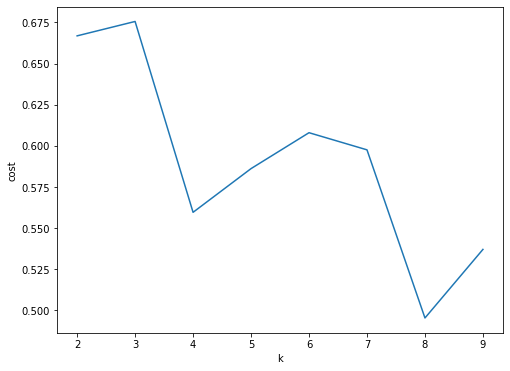

Text(0, 0.5, 'cost')

In [0]:
#Visualizing the silhouette scores in a plot
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1, figsize =(8,6))
ax.plot(range(2,10),silhouette_score)
ax.set_xlabel('k')
ax.set_ylabel('cost')

In [0]:
# check the number of cases at k = 8 which has the lowest cost

# we want the output for model k = 8
best_kmeans = KMeans(k=8, seed=1)  # 3 clusters here, default maxIterations = 20
model_best = best_kmeans.fit(df_kmeans_clean.select('features'))

# base model prediction
pred_best = model_best.transform(df_kmeans_clean)
pred_best.show() 

# base model evaluation
evaluator = ClusteringEvaluator()
silhouette = evaluator.evaluate(pred_best)
print("Silhouette with squared euclidean distance = " + str(silhouette))

# Shows the result.
centers = model_best.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center)
print(model_best.summary.clusterSizes)

+--------------------+----------+
 features|prediction|
+--------------------+----------+
[-122.42159271240...| 0|
[-122.42237091064...| 0|
[-122.45271301269...| 2|
[-122.44812774658...| 2|
[-122.44660949707...| 4|
[-122.38845825195...| 5|
[-122.43987274169...| 4|
[-122.46926116943...| 6|
[-122.41300201416...| 3|
[-122.41114044189...| 3|
[-122.42358398437...| 4|
[-122.39510345458...| 5|
[-122.41284179687...| 0|
[-122.40336608886...| 3|
[-122.41378784179...| 3|
[-122.42012023925...| 3|
[-122.49095153808...| 7|
[-122.41316223144...| 3|
[-122.41819000244...| 0|
[-122.42695617675...| 4|
+--------------------+----------+
only showing top 20 rows

Silhouette with squared euclidean distance = 0.5390439608184019
Cluster Centers: 
[-122.41608204 37.75733205]
[-122.41168706 37.79822189]
[-122.45040802 37.72371461]
[-122.40876549 37.78169215]
[-122.43386516 37.78002924]
[-122.3971842 37.72867819]
[-122.46255773 37.77257404]
[-122.4925121 37.75544485]
[348967, 218942, 172886, 700253, 275202, 207370, 135962, 101229]

## Now we know the best number of clusters is 8, and how many cases are in each cluster, let's do more EDA based on each cluster.

### 1. Find physical addresses for the centroids

1) cluster 0 : 3074 21st Street, San Francisco, CA 94110
Mission San Francisco California United States

2) cluster 1: 880 Vallejo Street, San Francisco, CA 94133
Chinatown San Francisco California United States

3) cluster 2:

k = 4 is the best model with the highest silhouette scores.
let's look at what are the landmarks of those centroids in map
here are our centroids:

## Cluster Centers: 
### [-122.41520643   37.78190733]
### [-120.5   90. ]
### [-122.41032205   37.73604276]
### [-122.47065181   37.75426887]

## By using reverse geocoded address finder like https://www.latlong.net/Show-Latitude-Longitude.html
1. 280 Golden Gate Avenue, San Francisco, CA 94102
Civic Center Tenderloin San Francisco

2. Cannot find address based on this set of coordinates.

3. 1000 Tompkins Ave, Bernel Heights, San Francisco, CA 94110

4. 50 Cascade Walk, Golden Gate Heights, San Francisco, CA 94116

However, because coordinates for cluster 2 cannot be found and looks drastically different from the other cluster centroids, let's try a different clustering method and see if we can avoid unrepresentative coordinates.

We will use Bisecting k-means.

Bisecting K-means is a kind of hierarchical clustering using a divisive (or “top-down”) approach: all observations start in one cluster, and splits are performed recursively as one moves down the hierarchy.

In [0]:
from pyspark.ml.clustering import BisectingKMeans
from pyspark.ml.evaluation import ClusteringEvaluator

# Trains a bisecting k-means model.
bkm = BisectingKMeans().setK(3).setSeed(1)
model_bkm = bkm.fit(df_kmeans)

# Make predictions
pred_bkm = model_bkm.transform(df_kmeans)

# Evaluate clustering by computing Silhouette score
evaluator = ClusteringEvaluator()
silhouette = evaluator.evaluate(pred_bkm)

print("Silhouette with squared euclidean distance = " + str(silhouette))

# Shows the result.
print("Cluster Centers: ")
centers = model_bkm.clusterCenters()
for center in centers:
    print(center)

Silhouette with squared euclidean distance = 0.47280302036037497
Cluster Centers: 
[-122.43457743 37.74761889]
[-122.41324425 37.78438572]
[-120.5 90. ]

In [0]:
# bisecting at k = 4 and k = 5

# Trains a bisecting k-means model.
bkm_2 = BisectingKMeans().setK(4).setSeed(1)
model_bkm2 = bkm_2.fit(df_kmeans)

# Make predictions
pred_bkm2 = model_bkm2.transform(df_kmeans)

# Evaluate clustering by computing Silhouette score
evaluator = ClusteringEvaluator()
silhouette = evaluator.evaluate(pred_bkm2)

print("Silhouette with squared euclidean distance = " + str(silhouette))

# Shows the result.
print("Cluster Centers: ")
centers = model_bkm2.clusterCenters()
for center in centers:
    print(center)
#######################################################################################

# Trains a bisecting k-means model.
bkm_3 = BisectingKMeans().setK(5).setSeed(1)
model_bkm3 = bkm_3.fit(df_kmeans)

# Make predictions
pred_bkm3 = model_bkm3.transform(df_kmeans)

# Evaluate clustering by computing Silhouette score
evaluator = ClusteringEvaluator()
silhouette = evaluator.evaluate(pred_bkm3)

print("Silhouette with squared euclidean distance = " + str(silhouette))

# Shows the result.
print("Cluster Centers: ")
centers = model_bkm3.clusterCenters()
for center in centers:
    print(center)


Silhouette with squared euclidean distance = 0.5973098772050401
Cluster Centers: 
[-122.46924904 37.75523534]
[-122.41468892 37.74331937]
[-122.41324425 37.78438572]
[-120.5 90. ]
Silhouette with squared euclidean distance = 0.4214437948899094
Cluster Centers: 
[-122.46924904 37.75523534]
[-122.41468892 37.74331937]
[-122.42665503 37.7894623 ]
[-122.40716917 37.78208602]
[-120.5 90. ]

Bisecting didn't outperform the traditional k-means method. And the [-120.5   90. ] set of coordinates exist in every model, so it is a representative centroid, just cannot be located in maps. Thoughts?

To conclude, when k = 4, the silhouette analysis performs the best.